age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64
Accuracy: 0.89
Classification Report:
              precision    recall  f1-score   support

          no       0.95      0.92      0.94       807
         yes       0.48      0.57      0.52        98

    accuracy                           0.89       905
   macro avg       0.71      0.75      0.73       905
weighted avg       0.90      0.89      0.89       905



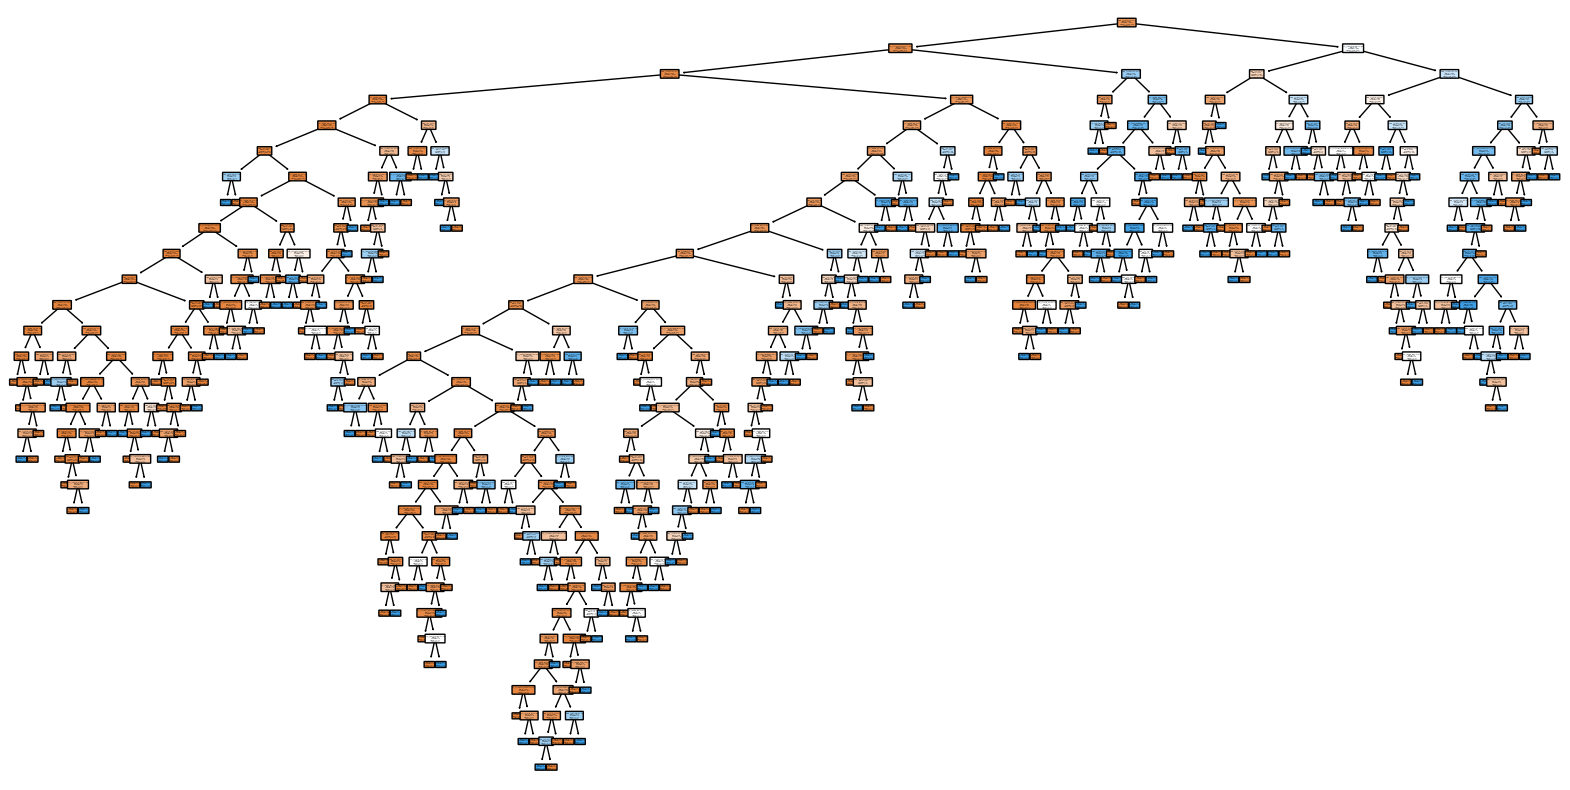

In [3]:


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the dataset
data_path = "C:\\Academics\\FINAL YEAR SEM1\\Data science internship\\bank+marketing\\bank\\bank.csv"

# Read the dataset
df = pd.read_csv(data_path, delimiter=';')

# Check for missing values
print(df.isnull().sum())

# Separate features and target variable
X = df.drop('y', axis=1)
y = df['y'].apply(lambda x: 1 if x == 'yes' else 0)

# Identify categorical and numeric columns
categorical_columns = X.select_dtypes(include=['object']).columns.tolist()
numeric_columns = X.select_dtypes(exclude=['object']).columns.tolist()

# Create a column transformer with OneHotEncoder for categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_columns),
        ('num', 'passthrough', numeric_columns)
    ]
)

# Create a pipeline with preprocessing and classifier
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['no', 'yes'])

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)

# Optional: Visualize the decision tree
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(20,10))
tree.plot_tree(
    clf.named_steps['classifier'],
    filled=True,
    feature_names=clf.named_steps['preprocessor'].get_feature_names_out().tolist(),
    class_names=['no', 'yes'],
    rounded=True
)
plt.show()
